In [33]:
#importing the proper packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#importing the data
fe = pd.read_csv('/Users/cenunez/Dropbox/Personal/Female Empowerment/Female Empowerment.csv')

After importing the data, I wanted to transform some of my variables into binary variables since they're not continuous and I wanted to measure their affect on responses.

In [35]:
#identifying the columns I want to transform into dummy variables
cols_to_transform = ['Gender Groups Y/N', 'Race Groups Y/N', 'Gender Comps Y/N', 'Race Comps Y/N', 'Age', 'Are you a current student?', 'Gender', 'Education']
fe_d = pd.get_dummies(fe, columns = cols_to_transform)
fe_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 39 columns):
ID                                            112 non-null int64
Empowerment Sent                              112 non-null object
Gender Group Sent                             112 non-null object
Race Group Sent                               112 non-null object
Gender Comp Sent                              112 non-null object
Race Comp Sent                                112 non-null object
Improvement Sent                              112 non-null object
Occupation/Title                              109 non-null object
School                                        110 non-null object
Cluster                                       112 non-null int64
Gender Groups Y/N_No                          112 non-null float64
Gender Groups Y/N_Yes                         112 non-null float64
Gender Groups Y/N_n/a                         112 non-null float64
Race Groups Y/N_No                  

Now that the data is dummied out, I wanted to see if any clusters existed. I initially ran 3 clusters, then 4 and then 2, but 3 was the most distinct of the bunch. 

In [36]:
#using k-means to cluster the data
fed2 = fe_d.ix[:,9:37]
fed3 = fed2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
from sklearn import cluster
km = cluster.KMeans(n_clusters=3) 
km1 = km.fit(fed3)
km1.labels_

array([2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0,
       1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

After clustering the data I wanted to see how they related to one another based on a set of unknown variables. As you'll see in the images below, the green dots (cluster 1) are very prominent, while the red and purple dots (clusters 2 & 3) are more overlapped. 

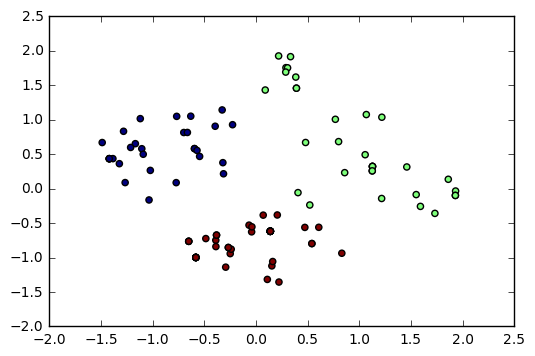

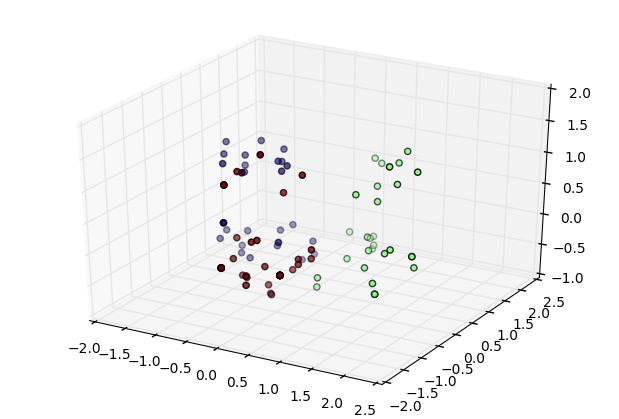

In [13]:
from sklearn.decomposition import PCA 
pca1 = PCA(n_components=) 
pca1.fit(fed3)
d_pca = pca1.transform(fed3) 
d_pca.shape
mycolors = km1.labels_[0:500]
plt.scatter(d_pca[0:500, 0], d_pca[0:500, 1], c=mycolors)
from mpl_toolkits.mplot3d import Axes3D 
import pylab
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(d_pca[0:500, 0], d_pca[0:500, 1], zs=d_pca[0:500, 2], c=mycolors)

In [76]:
cluster0 = fe.loc[fe['Cluster'] == 0]
cluster1 = fe.loc[fe['Cluster'] == 1]
cluster2 = fe.loc[fe['Cluster'] == 2]

# Overview of Cluster 1#
Looking at spread of:
Gender, Age, Education, Student Status, Gender Groups, Race Groups, Gender Comps, Race Comps

In [61]:
from collections import Counter
Counter(cluster0['Gender']).most_common()

[('Female', 42), ('Male', 8)]

In [62]:
# age
Counter(cluster0['Age']).most_common()

[('25 - 34', 23), ('18 - 24', 19), ('45 - 54', 4), ('35 - 44', 4)]

In [63]:
Counter(cluster0['Education']).most_common()

[("Bachelor's Degree", 44),
 ('Graduate Degree', 4),
 ('Juris Doctorate', 1),
 ('Doctorate Degree', 1)]

In [70]:
Counter(cluster0['Are you a current student?']).most_common()

[('No', 47), ('Yes, Full-Time', 3)]

In [67]:
Counter(cluster0['Gender Groups Y/N']).most_common()

[('Yes', 42), ('No', 7), ('n/a', 1)]

In [68]:
Counter(cluster0['Race Groups Y/N']).most_common()

[('Yes', 41), ('No', 6), ('n/a', 3)]

In [71]:
Counter(cluster0['Gender Comps Y/N']).most_common()

[('No', 50)]

In [72]:
Counter(cluster0['Race Comps Y/N']).most_common()

[('No', 49), ('n/a', 1)]

Overall, cluster 1 is primarily female, and non-students. They are the largest cluster and are against gender and race specific competitions. 

# Overview of Cluster 2#
Looking at spread of:
Gender, Age, Education, Student Status, Gender Groups, Race Groups, Gender Comps, Race Comps

In [77]:
Counter(cluster1['Gender']).most_common()

[('Female', 22), ('Male', 10)]

In [78]:
Counter(cluster1['Age']).most_common()


[('18 - 24', 31), ('25 - 34', 1)]

In [84]:
Counter(cluster1['Education']).most_common()

[('Some College / Associates Degree', 14),
 ("Bachelor's Degree", 8),
 ('Graduate Degree', 7),
 ('High School Graduate', 3)]

In [85]:
Counter(cluster1['Are you a current student?']).most_common()

[('Yes, Full-Time', 32)]

In [86]:
Counter(cluster1['Gender Groups Y/N']).most_common()

[('Yes', 22), ('No', 7), ('n/a', 3)]

In [87]:
Counter(cluster1['Race Groups Y/N']).most_common()

[('Yes', 22), ('No', 7), ('n/a', 3)]

In [88]:
Counter(cluster1['Gender Comps Y/N']).most_common()

[('No', 20), ('Yes', 10), ('Yes, but', 2)]

In [89]:
Counter(cluster1['Race Comps Y/N']).most_common()

[('No', 21), ('Yes', 6), ('Yes, but', 4), ('n/a', 1)]

Cluster 2 is comprised completely of full time students are are much more varied in their opinions on gender and race specific competitions and groups

# Overview of Cluster 3#
Looking at spread of:
Gender, Age, Education, Student Status, Gender Groups, Race Groups, Gender Comps, Race Comps

In [90]:
Counter(cluster2['Gender']).most_common()

[('Female', 18), ('Male', 12)]

In [91]:
Counter(cluster2['Age']).most_common()

[('25 - 34', 17), ('18 - 24', 11), ('35 - 44', 2)]

In [92]:
Counter(cluster2['Education']).most_common()

[("Bachelor's Degree", 23), ('Graduate Degree', 7)]

In [96]:
Counter(cluster2['Are you a current student?']).most_common()

[('No', 26), ('Yes, Part-time', 2), ('Yes, Full-Time', 2)]

In [97]:
Counter(cluster2['Gender Groups Y/N']).most_common()

[('Yes', 30)]

In [98]:
Counter(cluster2['Race Groups Y/N']).most_common()

[('Yes', 30)]

In [100]:
Counter(cluster2['Gender Comps Y/N']).most_common()

[('Yes', 13), ('Yes, but', 12), ('n/a', 5)]

In [101]:
Counter(cluster2['Race Comps Y/N']).most_common()

[('Yes', 13), ('Yes, but', 10), ('No', 4), ('n/a', 3)]

Cluster 3 has no objection to gender specific groups or competitions. There is some waivering in their objections in race specific ocmpetitions, but generally they are for these specialized groups and competitions. 

# Breakdown by Gender #
Aside from the differences among segments, I wanted to see if opinions differed by gender

In [109]:
male = fe.loc[fe['Gender'] == 'Male']
female = fe.loc[fe['Gender'] == 'Female']


## male ##

In [122]:
Counter(male['Age']).most_common()

[('18 - 24', 17), ('25 - 34', 12), ('35 - 44', 1)]

In [123]:
Counter(male['Education']).most_common()

[("Bachelor's Degree", 20),
 ('Some College / Associates Degree', 6),
 ('Graduate Degree', 2),
 ('High School Graduate', 2)]

In [125]:
Counter(male['Are you a current student?']).most_common()

[('No', 19), ('Yes, Full-Time', 10), ('Yes, Part-time', 1)]

In [112]:
Counter(male['Gender Groups Y/N']).most_common()

[('Yes', 23), ('No', 5), ('n/a', 2)]

In [113]:
Counter(male['Race Groups Y/N']).most_common()

[('Yes', 24), ('No', 4), ('n/a', 2)]

In [114]:
Counter(male['Gender Comps Y/N']).most_common()

[('No', 14), ('Yes', 8), ('Yes, but', 6), ('n/a', 2)]

In [120]:
Counter(male['Race Comps Y/N']).most_common()

[('No', 18), ('Yes', 6), ('n/a', 3), ('Yes, but', 3)]

## female ##

In [126]:
Counter(female['Age']).most_common()

[('18 - 24', 44), ('25 - 34', 29), ('35 - 44', 5), ('45 - 54', 4)]

In [127]:
Counter(female['Education']).most_common()

[("Bachelor's Degree", 55),
 ('Graduate Degree', 16),
 ('Some College / Associates Degree', 8),
 ('Juris Doctorate', 1),
 ('High School Graduate', 1),
 ('Doctorate Degree', 1)]

In [128]:
Counter(female['Are you a current student?']).most_common()

[('No', 54), ('Yes, Full-Time', 27), ('Yes, Part-time', 1)]

In [117]:
Counter(female['Gender Groups Y/N']).most_common()

[('Yes', 71), ('No', 9), ('n/a', 2)]

In [118]:
Counter(female['Race Groups Y/N']).most_common()

[('Yes', 69), ('No', 9), ('n/a', 4)]

In [119]:
Counter(female['Gender Comps Y/N']).most_common()

[('No', 56), ('Yes', 15), ('Yes, but', 8), ('n/a', 3)]

In [121]:
Counter(female['Race Comps Y/N']).most_common()

[('No', 56), ('Yes', 13), ('Yes, but', 11), ('n/a', 2)]